# Evolution of Einstein's equations

# Initial data constants definition

In [2]:
# Gaussian parameters
s1,s2=1,1;
R01,R02,R03=4,4,10; 
P=0.3;
P3=0;
B=0;

In [3]:
ori=0.0;
y0=0.0;

# Initial data , setting length of the domain and discretization


In [4]:
m=5;
N=2.0^m*100.0;
Rf=40.0;
dx=Rf/N;
R1=range(ori, stop=Rf, step=dx);
dt=dx*0.4;   #for backwards integration flip this sign, but flip the dissipation sign too
#dt=minimum(1 ./(1 .+ exp.(b .*R1.^2 .+d)))*dx*0.4;
Nt=100.0*2^m;
Tf=Nt*dt; #final time
println("the final time is ", Tf)

the final time is 16.000000000000004


In [5]:
epsilon=0.05; #05; #02;#0.05; #0.05; #0.05;#0.05;#0.05; #dissipation strength (-1 for backwards integration)
omicron=0.0;#setting dissipation operator to O(R^2)
omega=120.0; #1/dx^4; #1/dx^2; #/dx^4;

#Runge-Kutta integrator for each time step i

In [6]:
R =range(ori-2.0*dx, stop=Rf+2.0*dx, step=dx); #change in case you want to evolve a symmetric domain

L=length(R);
println("step size is  ", dx)

T=range(dt,stop=Tf,step=dt)
println("the time step is ", dt)

step size is  0.0125
the time step is 0.005000000000000001


In [7]:
include("./DoubleNullgauge.jl");

# Solving for the constraint with double resolution

In [9]:
initf=rungekutta4(TMconstraint, y0, R1);
#initg=rungekutta4(, , R1);
#using CSV, Tables
#CSV.write("/home/kri/Documents/DATA/Cr_initial_data_SphGR_gaussian.csv", Tables.table(initial_data), writeheader=false)

## Evolving with staggered grid  with one resolution lower and passing half the initial data

In [10]:
#adding ghost positions
initfL=zeros(L);
initfL[3:L-2]=initf[1:L-4]; 

# Defining the initial state array for the evolution

In [11]:
#state_array=[zeros(L) zeros(L) zeros(L) R ones(L) -ones(L) scalar_timeder(R) scalar_spaceder(R) scalar_field(R)];
state_array=[initfL cos.(R)]; #TRY: here I should give both initf and initg
state_array=ghost(state_array);
dy=zeros(length(state_array[1,:]))

LoadError: UndefVarError: initfL not defined

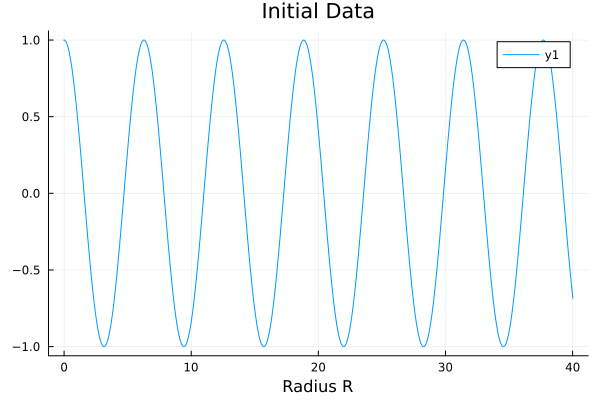

In [12]:
using Plots #showing initial data and the initial status of the horizon finder
plot(R, (state_array[:,1]), xaxis="Radius R",title="Initial Data")

In [13]:
#truncation error
using Peaks
findmaxima(state_array[:,2])[2]*dx^2

6-element Vector{Float64}:
 0.00031249869142530327
 0.00031249999615097534
 0.00031249839204152357
 0.0003124989599959533
 0.00031249996533758894
 0.0003124980618446744

 ## Evolution

In [14]:
using ProgressMeter
@showprogress for k in 1:length(T)
    state_array=rungekutta4molstep(TMRHS,state_array,T,k,0)   
    state_array=ghost(state_array)
            #if mod(k,30)==1
    using CSV, Tables
    CSV.write("/home/rita13santos/Desktop/MSc Thesis/DATA/DNGauge/time_step$k.csv", Tables.table(state_array), writeheader=false)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:02:27


## Movie of the evolution

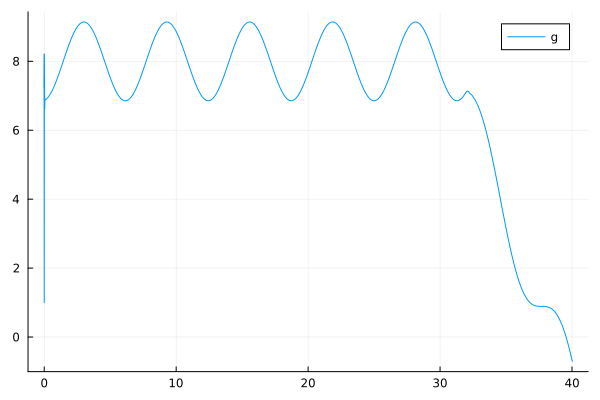

In [15]:
#making a movie of the evolution
global dir="/home/rita13santos/Desktop/MSc Thesis/DATA/DNGauge/"
using Plots, CSV, DataFrames
import GR
for n in 1:1:length(T)-1
    time_step=T[n+1]-T[n];
    IJulia.clear_output(true)
    #functions3=DataFrame(CSV.File("/home/kri/Documents/DATA/PBHconvergence/time_steps_1/time_step$(n).csv",header=false, delim=","))
    #functions3=DataFrame(CSV.File("/home/kri/Documents/DATA/Crconvergence/Cr_time_steps_1/time_step$(n).csv",header=false, delim=","))
    #functions3=DataFrame(CSV.File("/home/kri/Documents/DATA/time_steps/time_step$n.csv",header=false, delim=","))
     functions3=DataFrame(CSV.File(joinpath(dir,"time_step$n.csv"),header=false, delim=","))
    plot()
        y=functions3.Column1[1:L];
        z=functions3.Column2[1:L];
    d=round(T[n],digits=1)
    plot!(R, y, labels=["f" "g"]) |> display 
    
    #png("/home/kri/Documents/DATA/time_steps/imagesfixedbackground/$n.png")
    #[y z u v]
    #(1 .+z)./(1 .-z)
    #( x .*(1 .-exp.(-y./2)./sqrt.(1 .-z))) ADMmass
    #plot!(x, [y w v u K W (1 .+z)./(1 .-z)],xlims=(0,20)) |> display
    #(z./(2 .-z))
    #plot(x, [y z w v u ((1 .+ x.*z)./(1 .- x.*z)) K], title="T=$d", ylims=(-0.3,0.3),xlims=(0,5)) |> display
end

Try other boundary conditions and RHS of RungeKutta4: A function (dependance on time)



r=0 try extrapolation 